#深度學習網路(2個隱藏層)-處理MNIST手寫數字辨識

### (1)掛載雲端硬碟，讀取中文字體

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2)import必要的套件

In [ ]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
twfont1 = plt_font.FontProperties(fname="drive/My Drive/DL_CLASS/kaiu.ttf")

### (3)從檔案mnist_train.csv讀入訓練資料，從檔案mnist_valid.csv讀入測試資料
#### 檔案很大載入時間比較久，請耐心等候

In [ ]:
train_data= np.loadtxt("drive/My Drive/DL_CLASS/mnist_train.csv",delimiter=",")
valid_data = np.loadtxt("drive/My Drive/DL_CLASS/mnist_valid.csv",delimiter=",")

### (4)取出訓練資料集的標示資料train_data_y和特徵（像素）資料train_data_x，取出驗證資料集的標識資料valid_data_y和特徵（像素）資料valid_data_x

In [ ]:
train_data_y = train_data[:, 0]
valid_data_y = valid_data[:, 0]
train_data_x = train_data[:, 1:]
valid_data_x = valid_data[:, 1:]

### (5)定義將標示資料轉換為one_hot_encode格式的函式

In [ ]:
def one_hot_encode(data_y):
  one_hot_y=np.zeros((data_y.shape[0],10), dtype=np.int)
  for i in range(data_y.shape[0]):
    one_hot_y[i][int(data_y[i])]=1
  return   one_hot_y
Y_train = one_hot_encode(train_data_y)

<ipython-input-5-9554249a40f8>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_y=np.zeros((data_y.shape[0],10), dtype=np.int)


### (6)將像素資料(train_data_x、valid_data_x)做特徵縮放轉換為歸一化

In [ ]:
X_train = train_data_x / 255.
X_valid = valid_data_x / 255.

### (7)定義各種激活函數(activation functions)及其導函數

In [ ]:
def relu(p):
  return np.maximum(0, p)

def softmax(u):
  return np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)

def drelu(x):
  x[x <= 0] = 0
  x[x > 0] = 1
  return x

### (8)定義輸入層、隱藏層和輸出層的神經元節點數量

In [ ]:
InputNodes=784
Hidden1Nodes=50
Hidden2Nodes=50
OutputNodes=10

### (9)亂數初始化隱藏層、輸出層的權重和偏值

In [ ]:
HiddenL1_W=np.random.randn(InputNodes,Hidden1Nodes) * (np.sqrt(2/InputNodes))
HiddenL1_B=np.zeros((1,Hidden1Nodes))
HiddenL2_W=np.random.randn(Hidden1Nodes,Hidden2Nodes) * (np.sqrt(2/Hidden1Nodes))
HiddenL2_B=np.zeros((1,Hidden2Nodes))
OutputL_W=np.random.randn(Hidden2Nodes,OutputNodes) * (np.sqrt(2/Hidden2Nodes))
OutputL_B=np.zeros((1,OutputNodes))

### (10)定義前向傳播各層的處理函數

In [ ]:
def Forward(X):
  HiddenL1_Sum=np.dot(X,HiddenL1_W)+HiddenL1_B
  HiddenL1_Output=relu(HiddenL1_Sum)
  HiddenL2_Sum=np.dot(HiddenL1_Output,HiddenL2_W)+HiddenL2_B
  HiddenL2_Output=relu(HiddenL2_Sum)
  OutputL_Sum= np.dot(HiddenL2_Output, OutputL_W) + OutputL_B
  OutputL_Output= softmax(OutputL_Sum)
  return (HiddenL1_Sum,HiddenL1_Output,HiddenL2_Sum,HiddenL2_Output,OutputL_Sum,OutputL_Output)

### (11)定義反向傳播各層的處理函數

In [ ]:
def Backward():
  dZ3 = (OutputL_Output - Y_train)/X_train.shape[0]
  dW3 = np.dot(HiddenL2_Output.T,dZ3)
  dB3 = np.sum(dZ3, axis=0, keepdims=True)
  dZ2 = np.dot(dZ3,OutputL_W.T) * drelu(HiddenL2_Sum)
  dW2 = np.dot(HiddenL1_Output.T,dZ2)
  dB2 = np.sum(dZ2,axis=0, keepdims=True)
  dZ1 = np.dot(dZ2,HiddenL2_W.T) * drelu(HiddenL1_Sum)
  dW1 = np.dot(X_train.T,dZ1)
  dB1= np.sum(dZ1,axis=0, keepdims=True)
  return (dW3,dB3,dW2,dB2,dW1,dB1)

### (12)設定訓練時的參數

In [ ]:
ETA= 0.3
LossList=[]

### (13)開始訓練神經網路

In [ ]:
for epoch in range(500):
  HiddenL1_Sum,HiddenL1_Output,HiddenL2_Sum,HiddenL2_Output,OutputL_Sum,OutputL_Output= Forward(X_train)
  dW3,dB3,dW2,dB2,dW1,dB1=Backward()
  HiddenL1_W=HiddenL1_W-ETA*dW1
  HiddenL1_B=HiddenL1_B-ETA*dB1
  HiddenL2_W=HiddenL2_W-ETA*dW2
  HiddenL2_B=HiddenL2_B-ETA*dB2
  OutputL_W=OutputL_W-ETA*dW3
  OutputL_B=OutputL_B-ETA*dB3
  if epoch%10==9:
    Loss = - np.sum(Y_train * np.log(OutputL_Output))
    LossList.append(Loss)
    print("學習次數：", epoch+1,"損失函數",Loss)
    display.clear_output(wait=True)

學習次數： 500 損失函數 8062.7014772194625


### (14)劃出損失函數(Loss Function)對學習次數的關係圖

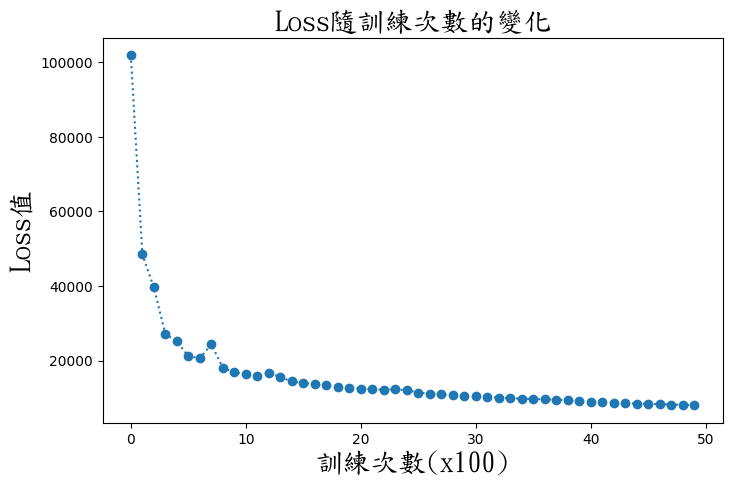

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20)
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20)
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(LossList,":o")
plt.show()

## 步驟(15)-測試驗證集資料的辨識正確率

In [ ]:
_1,_2,_3,_4,_6,OutputL_Output=Forward(X_valid)
Predi_Y=np.argmax(OutputL_Output, axis=1)
Right=0
for i in range(X_valid.shape[0]):
  if int(Predi_Y[i])==int(valid_data_y[i]):
    Right+=1
print("辨識正確率為：",Right/X_valid.shape[0])

辨識正確率為： 0.9567
